## Task-D: Collinear features and their effect on linear models

In [280]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [281]:
data = pd.read_csv('task_d.csv')

In [282]:
print(data.shape)
data.head()

(100, 8)


,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [283]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
X.shape

(100, 7)

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Task 1  (Logistic Regression)

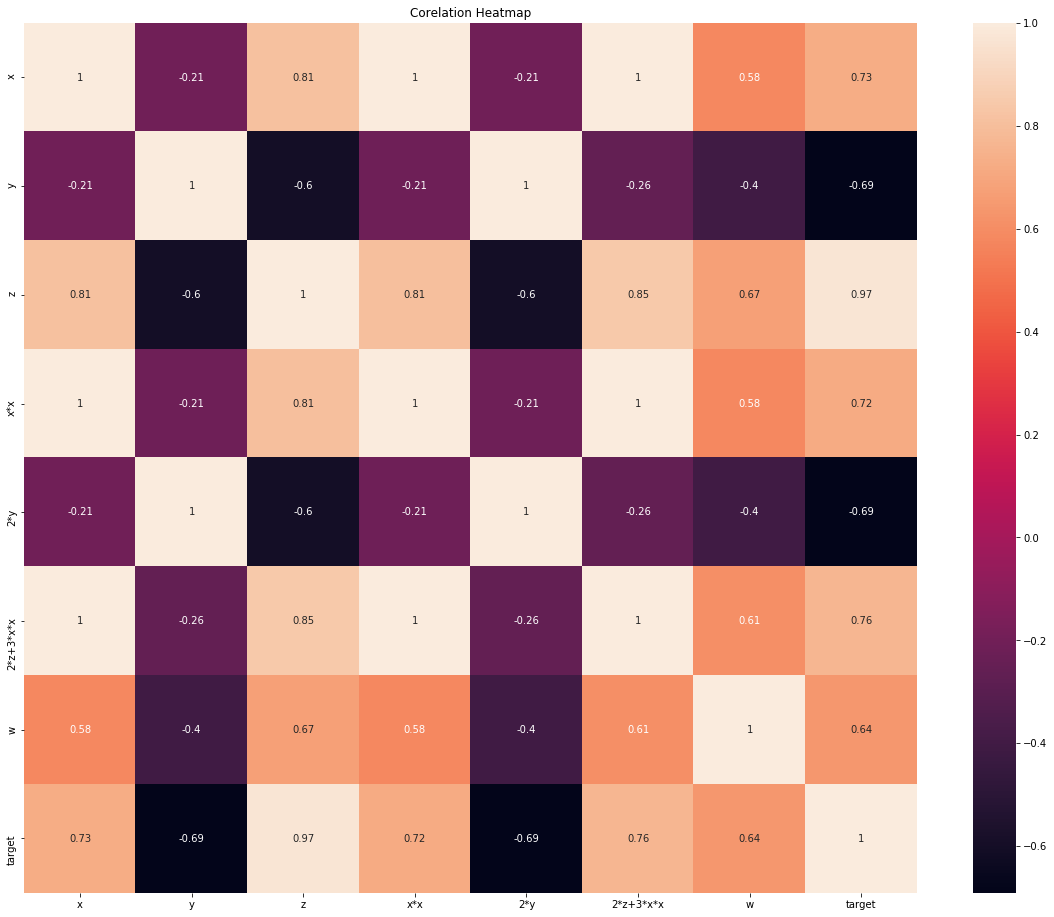

In [284]:
# 1
plt.figure(figsize=(20,16))
plt.title('Corelation Heatmap')
corltn = data.corr()
sns.heatmap(corltn,annot=True)
plt.show()

In [285]:
# 2
c_space = np.logspace(-4, 3, 7)#creates an array of [10^-4 to 10^3 limit 7 values]
param_grid = {'C' : c_space}
lr_model = LogisticRegression()
clf = GridSearchCV(lr_model,param_grid)
clf.fit(X,Y)
print('Best value of C',clf.best_params_)


Best value of C {'C': 0.0001}


In [286]:
#3
best_model = LogisticRegression(C=0.0001)
best_model.fit(X,Y)
y_pred = best_model.predict(X)
best_model_accuracy = metrics.accuracy_score(y_pred,Y)
W = best_model.coef_
print('Weights of the best model{}'.format(W))
print('Accuracy of the best model {}%'.format(best_model_accuracy*100))

Weights of the best model[[ 0.0035963  -0.00341973  0.00479983  0.00355269 -0.00341973  0.00377695
   0.00316971]]
Accuracy of the best model 100.0%


In [287]:
#4

row = np.array([10**-2]*7) #creating [0.01,..0.01] as outlier row
X_dash = np.vstack((X,row))#adding the outlier
Y = np.append(Y,0) # adding a row to Y i.e target to match dimension
best_model.fit(X_dash,Y) #fitting the model again with the modified data
y_pred = best_model.predict(X_dash)
best_model_accuracy_edited = metrics.accuracy_score(y_pred,Y)
W_dash = best_model.coef_
print('Accuracy of the best model after outlier {}%'.format(best_model_accuracy_edited*100))
print('Weights of the best model{}'.format(W_dash))

Accuracy of the best model after outlier 70.29702970297029%
Weights of the best model[[ 0.00359582 -0.00342001  0.00479972  0.00355216 -0.00342001  0.00377646
   0.00316902]]


In [288]:
#

def calc_percent_change(a,b):
    res = abs(b-a)
    perc_ = [abs((res[i]/a[i])*100) for i in range(len(a))]
    return perc_


difference_in_weights = abs(W - W_dash)
print('Absolute change in weights {}'.format(difference_in_weights[0]))
percent_change = calc_percent_change(W[0],W_dash[0])
print('\nFeature\t\t\t %Change')
top_feature = {}
for idx,cols in enumerate((data.drop(['target'],axis=1)).columns):
    print(cols,' :\t\t',percent_change[idx])
    top_feature[percent_change[idx]]  = cols

print('\nTop 4 feature as per highest % change in weights')
for j,perc in enumerate(sorted(top_feature,reverse=True)[:4]):
    print(top_feature[perc])
    

Absolute change in weights [4.82929844e-07 2.76457016e-07 1.16379249e-07 5.32966529e-07
 2.76457016e-07 4.83445197e-07 6.91227322e-07]

Feature			 %Change
x  :		 0.013428518868272194
y  :		 0.008084169247761053
z  :		 0.002424652579026642
x*x  :		 0.015001773234959439
2*y  :		 0.008084169247761053
2*z+3*x*x  :		 0.012799889562092347
w  :		 0.021807295249895872

Top 4 feature as per highest % change in weights
w
x*x
x
2*z+3*x*x


# Task 2 (SVM)


In [289]:
#reset the data points

X = data.drop(['target'], axis=1).values
Y = data['target'].values
X.shape

(100, 7)

In [290]:
# 2
c_space = np.logspace(-4, 3, 7)#creates an array of [10^-4 to 10^3 limit 7 values]
param_grid = {'alpha' : c_space}
svm_model = SGDClassifier(loss='hinge')
clf = GridSearchCV(svm_model,param_grid)
clf.fit(X,Y)
print('Best value of C',clf.best_params_)




Best value of C {'alpha': 0.0001}


In [291]:
#3
best_model = SGDClassifier(loss='hinge',alpha=0.0001)
best_model.fit(X,Y)
y_pred = best_model.predict(X)
best_model_accuracy = metrics.accuracy_score(y_pred,Y)
W = best_model.coef_
print('Weights of the best model{}'.format(W))
print('Accuracy of the best model {}%'.format(best_model_accuracy*100))

Weights of the best model[[ 4.60549157 -6.99003529 19.80601486  3.55221023 -6.99003529  5.58824524
   7.50129513]]
Accuracy of the best model 100.0%


In [292]:
#4

row = np.array([10**-2]*7) #creating [0.01,..0.01] as outlier row
X_dash = np.vstack((X,row))#adding the outlier
Y = np.append(Y,0) # adding a row to Y i.e target to match dimension
best_model.fit(X_dash,Y) #fitting the model again with the modified data
y_pred = best_model.predict(X_dash)
best_model_accuracy_edited = metrics.accuracy_score(y_pred,Y)
W_dash = best_model.coef_
print('Accuracy of the best model after outlier {}%'.format(best_model_accuracy_edited*100))
print('Weights of the best model{} after adding outliers'.format(W_dash))

Accuracy of the best model after outlier 100.0%
Weights of the best model[[ 8.27514241 -7.48254409 18.84114803  6.65609628 -7.48254409  8.26941064
   2.47273017]] after adding outliers


In [293]:
def calc_percent_change(a,b):
    res = abs(b-a)
    perc_ = [abs((res[i]/a[i])*100) for i in range(len(a))]
    return perc_


difference_in_weights = abs(W - W_dash)
print('Absolute change in weights {}'.format(difference_in_weights[0]))
percent_change = calc_percent_change(W[0],W_dash[0])
print('\nFeature      %Change')
top_feature = {}
for idx,cols in enumerate((data.drop(['target'],axis=1)).columns):
    print(cols,' : ',percent_change[idx])
    top_feature[percent_change[idx]]  = cols

print('\nTop 4 feature as per highest % change in weights')
for j,perc in enumerate(sorted(top_feature,reverse=True)[:4]):
    print(top_feature[perc])
    

Absolute change in weights [3.66965085 0.4925088  0.96486683 3.10388605 0.4925088  2.68116541
 5.02856496]

Feature      %Change
x  :  79.67989511990862
y  :  7.045870070897468
z  :  4.871584906688906
x*x  :  87.3790077123605
2*y  :  7.045870070897468
2*z+3*x*x  :  47.97866403451905
w  :  67.03595674840122

Top 4 feature as per highest % change in weights
x*x
x
w
2*z+3*x*x


# Observations

1. Heatmap for the co-relations of all the features show obvious result i.e (x,x*x) are directly co-related hence the co-relation is 1(max). Similary any feature that is used as another feature shows high co-relation


2. Best value of C(alpha in case of SVM) found to be 0.0001 for both the models.


3. Both the model have a train accuracy of 100% because it is a simple model with simple co-related features, thus is easily fitted by a hyper-plane.


4. Important thing to observe is, upon adding an outlier to dataset doesnot impact much to the model weights of the logistic regression implies the model did not change much by the single outlier. As the change in weights is very less.


5. However, weights of SVM model changed significantly with the single outlier because percentage change for both the weights is significant for each weight.



6. On a similar note accuracy of LR model after the outlier decreased significantly as the model did not try to cope much to the outlier. But SVM model accuracy remained 100% indicating the model is clearly over-fitting.



7. We can conclude for this particular dataset, LogisticRegression model is more prone to outlier as compared to linear SVM.